# Projeto Ciência de Dados - Previsão de Vendas

- Nosso desafio é conseguir prever as vendas que vamos ter em determinado período com base nos gastos em anúncios nas 3 grandes redes que a empresa Hashtag investe: TV, Jornal e Rádio

- Base de Dados: https://drive.google.com/drive/folders/1ThpK_nfciHuTnUuIxDiLqhuPsWsqV-q7?usp=share_link

### Passo a Passo de um Projeto de Ciência de Dados

- Passo 1: Entendimento do Desafio
- Passo 2: Entendimento da Área/Empresa
- Passo 3: Extração/Obtenção de Dados
- Passo 4: Ajuste de Dados (Tratamento/Limpeza)
- Passo 5: Análise Exploratória
- Passo 6: Modelagem + Algoritmos
- Passo 7: Interpretação de Resultados

# Projeto Ciência de Dados - Previsão de Vendas

- Nosso desafio é conseguir prever as vendas que vamos ter em determinado período com base nos gastos em anúncios nas 3 grandes redes que a empresa Hashtag investe: TV, Jornal e Rádio
- TV, Jornal e Rádio estão em milhares de reais
- Vendas estão em milhões

In [182]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

#### Importar a Base de dados

In [183]:
base_dados = pd.read_csv('advertising.csv')
display(base_dados)

,TV,Radio,Jornal,Vendas
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


In [184]:
base_dados.info() # verificar os dados 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   TV      200 non-null    float64
 1   Radio   200 non-null    float64
 2   Jornal  200 non-null    float64
 3   Vendas  200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


#### Análise Exploratória
- Vamos tentar visualizar como as informações de cada item estão distribuídas
- Vamos ver a correlação entre cada um dos itens

In [185]:
correlacao = base_dados.corr() # correlação entre as informações
display(correlacao)

,TV,Radio,Jornal,Vendas
TV,1.000000,0.054809,0.056648,0.901208
Radio,0.054809,1.000000,0.354104,0.349631
Jornal,0.056648,0.354104,1.000000,0.157960
Vendas,0.901208,0.349631,0.157960,1.000000


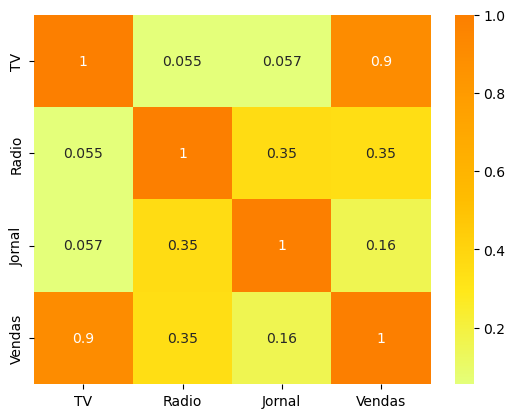

In [186]:
sns.heatmap(correlacao, cmap='Wistia', annot=True) # criar um mapa de calor com as correlações
plt.show()

#### Com isso, podemos partir para a preparação dos dados para treinarmos o Modelo de Machine Learning

- Separando em dados de treino e dados de teste

In [187]:
X = base_dados[['TV', 'Radio', 'Jornal']].values.reshape(-1, 3) # Dados para prever para um array 2D
y = base_dados['Vendas'].values.reshape(-1, 1) # Previsor para um array 2D

In [188]:
# Separar em treino e teste
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.3)

#### Temos um problema de regressão - Vamos escolher os modelos que vamos usar:

- Regressão Linear
- RandomForest (Árvore de Decisão)

In [189]:
# Criar os modelos
modelo_regressao_linear = LinearRegression()
modelo_arvore_decisao = RandomForestRegressor()

# Treinar os modelos
modelo_regressao_linear.fit(X_treino, y_treino)
modelo_arvore_decisao.fit(X_treino, y_treino)

C:\Users\DaniloSantos\AppData\Local\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestRegressor()

#### Teste da AI e Avaliação do Melhor Modelo

- Vamos usar o R² -> diz o % que o nosso modelo consegue explicar o que acontece

In [190]:
# Previsões
previsao_regressao_linear = modelo_regressao_linear.predict(X_teste)
previsao_arvore_decisao = modelo_arvore_decisao.predict(X_teste)

# Comparar previsão com o y_teste
print(f'Previsão da Regressão Linear: {r2_score(y_teste, previsao_regressao_linear):.2%}')
print(f'Previsão da Árvore de Decisão: {r2_score(y_teste, previsao_arvore_decisao):.2%}')

Previsão da Regressão Linear: 90.25%
Previsão da Árvore de Decisão: 94.94%


#### Visualização Gráfica das Previsões

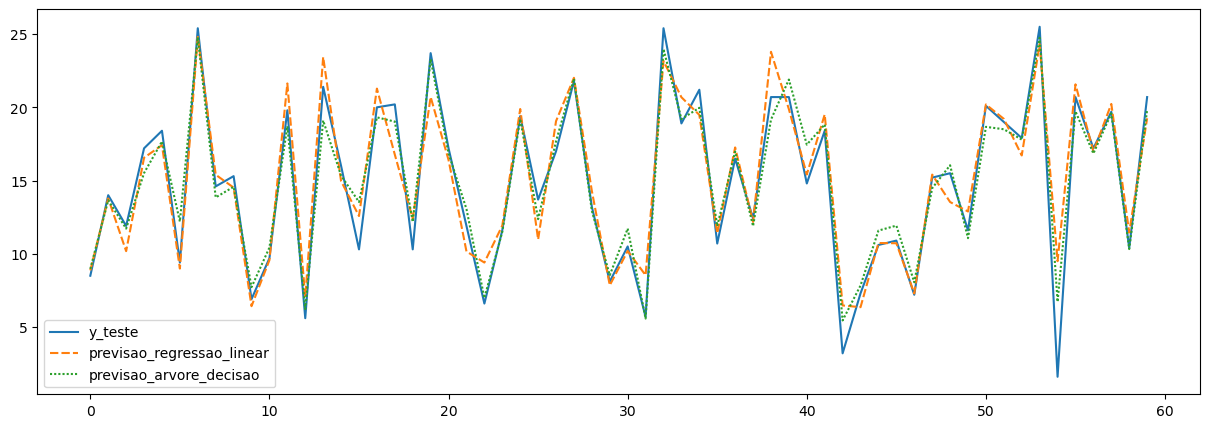

In [191]:
# Transformar o array 2D em um array 1D como o método flatten
tabela_auxiliar = pd.DataFrame({
    'y_teste': y_teste.flatten(),
    'previsao_regressao_linear': previsao_regressao_linear.flatten(),
    'previsao_arvore_decisao': previsao_arvore_decisao.flatten()
})

plt.figure(figsize=(15,5))
sns.lineplot(data=tabela_auxiliar)
plt.show()

#### Como fazer uma nova previsão?

In [192]:
# Lendo uma nova base de dados
nova_base_dados = pd.read_csv('novos.csv')
nova_base_dados

,TV,Radio,Jornal
0,23.1,3.8,69.2
1,44.5,0.0,5.1
2,170.2,45.9,0.0


In [213]:
# Novas previsões com base na nova_base_dados
nova_previsao = modelo_arvore_decisao.predict(nova_base_dados)

# Valores em milhõe de cada cenário
for i, previsao in enumerate(nova_previsao):
    print(f'Previsão {i+1}: {previsao:.2f}')

Previsão 1: 7.70
Previsão 2: 8.51
Previsão 3: 19.67


C:\Users\DaniloSantos\AppData\Local\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(
